In [61]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import psycopg2
import pandas as pd
from psycopg2.extras import execute_values

# Data for CITI bikes

In [40]:
bike_files = glob.glob('bike-rental-starter-kit/data/JC*.csv')

In [42]:
df_list = []
for i in bike_files:
    data = pd.read_csv(i)
    df_list.append(data)

citi_bike = pd.concat(df_list)

In [43]:
citi_bike.head(1)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,361,2016-02-01 00:31:18,2016-02-01 00:37:19,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24393,Subscriber,1975.0,1


In [44]:
citi_bike.columns
#citi_bike.columns = map(str.replace(' ', '_').lower(), citi_bike.columns)
old_column_list = list(citi_bike.columns)
print('Old Column List', old_column_list)
new_column_list = []
for i in old_column_list:
    temp = i.replace(' ', '_').lower()
    new_column_list.append(temp)
print('New Column List', new_column_list)

Old Column List ['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude', 'End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type', 'Birth Year', 'Gender']
New Column List ['trip_duration', 'start_time', 'stop_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'birth_year', 'gender']


In [45]:
#rename columns
citi_bike.columns = new_column_list

In [46]:
citi_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247584 entries, 0 to 19487
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   trip_duration            247584 non-null  int64  
 1   start_time               247584 non-null  object 
 2   stop_time                247584 non-null  object 
 3   start_station_id         247584 non-null  int64  
 4   start_station_name       247584 non-null  object 
 5   start_station_latitude   247584 non-null  float64
 6   start_station_longitude  247584 non-null  float64
 7   end_station_id           247584 non-null  int64  
 8   end_station_name         247584 non-null  object 
 9   end_station_latitude     247584 non-null  float64
 10  end_station_longitude    247584 non-null  float64
 11  bike_id                  247584 non-null  int64  
 12  user_type                247204 non-null  object 
 13  birth_year               228585 non-null  float64
 14  gende

In [66]:
citi_bike.head(10)

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender
0,361,2016-02-01 00:31:18,2016-02-01 00:37:19,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24393,Subscriber,1975.0,1
1,297,2016-02-01 01:55:05,2016-02-01 02:00:02,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24394,Subscriber,1985.0,2
2,1155,2016-02-01 02:40:05,2016-02-01 02:59:20,3183,Exchange Place,40.716247,-74.033459,3210,Pershing Field,40.742677,-74.051789,24676,Subscriber,1976.0,1
3,1769,2016-02-01 05:11:28,2016-02-01 05:40:58,3214,Essex Light Rail,40.712774,-74.036486,3203,Hamilton Park,40.727596,-74.044247,24700,Subscriber,1974.0,2
4,935,2016-02-01 05:48:24,2016-02-01 06:03:59,3203,Hamilton Park,40.727596,-74.044247,3214,Essex Light Rail,40.712774,-74.036486,24639,Subscriber,1974.0,2
5,569,2016-02-01 05:52:18,2016-02-01 06:01:47,3212,Christ Hospital,40.734786,-74.050444,3185,City Hall,40.717732,-74.043845,24498,Subscriber,1984.0,2
6,293,2016-02-01 06:01:32,2016-02-01 06:06:25,3214,Essex Light Rail,40.712774,-74.036486,3186,Grove St PATH,40.719586,-74.043117,24621,Subscriber,1974.0,1
7,252,2016-02-01 06:01:51,2016-02-01 06:06:03,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,-74.043117,24560,Subscriber,1991.0,1
8,256,2016-02-01 06:20:48,2016-02-01 06:25:04,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,-74.043117,24386,Subscriber,1989.0,2
9,94,2016-02-01 06:36:42,2016-02-01 06:38:17,3184,Paulus Hook,40.714145,-74.033552,3183,Exchange Place,40.716247,-74.033459,24702,Subscriber,1990.0,2


In [48]:
citi_bike.isnull().sum()

trip_duration                  0
start_time                     0
stop_time                      0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                    380
birth_year                 18999
gender                         0
dtype: int64

In [49]:
# fill N/A values
citi_bike = citi_bike.fillna(value={"user_type":'N/A', "birth_year":citi_bike.birth_year.mean()})

In [50]:
citi_bike.isnull().sum()

trip_duration              0
start_time                 0
stop_time                  0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
birth_year                 0
gender                     0
dtype: int64

In [51]:
citi_bike.shape

(247584, 15)

In [52]:
citi_bike.describe()

,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,gender
count,2.475840e+05,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000
mean,8.856305e+02,3207.065206,40.723121,-74.046438,3203.572553,40.722594,-74.045855,24935.260481,1979.335276,1.123534
std,3.593798e+04,26.955103,0.008199,0.011211,61.579494,0.007958,0.011283,748.469712,9.221241,0.518687
min,6.100000e+01,3183.000000,40.692640,-74.096937,147.000000,40.692216,-74.096937,14552.000000,1900.000000,0.000000
25%,2.480000e+02,3186.000000,40.717732,-74.050656,3186.000000,40.716540,-74.050444,24491.000000,1975.000000,1.000000
50%,3.900000e+02,3201.000000,40.721525,-74.044247,3199.000000,40.721124,-74.043117,24609.000000,1981.000000,1.000000
75%,6.660000e+02,3211.000000,40.727596,-74.038051,3211.000000,40.727224,-74.036486,24719.000000,1986.000000,1.000000
max,1.632981e+07,3426.000000,40.752559,-74.032108,3426.000000,40.801343,-73.957390,27274.000000,2000.000000,2.000000


1

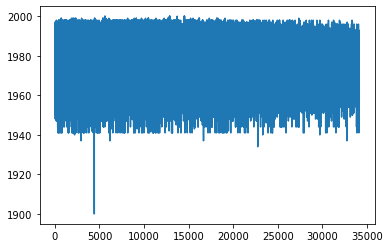

In [53]:
plt.plot(citi_bike.birth_year)
len(citi_bike[citi_bike.birth_year == 1900])

In [54]:
#Drop the birth year 1900
citi_bike = citi_bike[citi_bike['birth_year'] != 1900]
citi_bike.describe()

,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,gender
count,2.475830e+05,247583.000000,247583.000000,247583.000000,247583.000000,247583.000000,247583.000000,247583.000000,247583.000000,247583.000000
mean,8.856300e+02,3207.065194,40.723121,-74.046438,3203.572588,40.722594,-74.045855,24935.262017,1979.335596,1.123534
std,3.593805e+04,26.955157,0.008199,0.011211,61.579616,0.007958,0.011283,748.470833,9.219881,0.518688
min,6.100000e+01,3183.000000,40.692640,-74.096937,147.000000,40.692216,-74.096937,14552.000000,1934.000000,0.000000
25%,2.480000e+02,3186.000000,40.717732,-74.050656,3186.000000,40.716540,-74.050444,24491.000000,1975.000000,1.000000
50%,3.900000e+02,3201.000000,40.721525,-74.044247,3199.000000,40.721124,-74.043117,24609.000000,1981.000000,1.000000
75%,6.660000e+02,3211.000000,40.727596,-74.038051,3211.000000,40.727224,-74.036486,24719.000000,1986.000000,1.000000
max,1.632981e+07,3426.000000,40.752559,-74.032108,3426.000000,40.801343,-73.957390,27274.000000,2000.000000,2.000000


# Data to database

## Stations table

In [81]:
#New Column List ['trip_duration', 'start_time', 'stop_time', 'start_station_id', 'start_station_name', 
#'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 
#'end_station_longitude', 'bike_id', 'user_type', 'birth_year', 'gender']
start_trip = citi_bike[['start_station_id', 'start_station_name', 'start_station_longitude', 'start_station_latitude']]
end_trip = citi_bike[['end_station_id', 'end_station_name', 'end_station_longitude', 'end_station_latitude']]
start_trip.columns = ['station_id', 'station_name', 'station_longitude', 'station_latitude']
end_trip.columns = ['station_id', 'station_name', 'station_longitude', 'station_latitude']
combined_station = pd.concat([start_trip, end_trip], ignore_index=True)
print(combined_station.nunique())
combined_station = combined_station.drop_duplicates()
print(len(combined_station))

station_id           102
station_name         102
station_longitude    102
station_latitude     102
dtype: int64
102


## Trip Table

In [82]:
trips = citi_bike[['trip_duration', 'start_time', 'stop_time', 'start_station_id', 'end_station_id', 'bike_id', 'user_type', 'birth_year', 'gender']]

# Link the database

In [83]:
conn = None
cur = None

try:
    # database connection
    conn = psycopg2.connect(
        host = '127.0.0.1',
        dbname = 'bikerental',
        user = 'postgres',
        password = 248650,
        port = 25060)

    cur = conn.cursor()
    '''
    # Find the new data
    cur.execute("SELECT MAX(Timestamp) FROM id_system_test")
    latest_date_in_db = cur.fetchone()[0]
    if latest_date_in_db:
        latest_date_in_db = pd.to_datetime(latest_date_in_db).tz_convert(None)
        new_data = df[df['Timestamp'] > latest_date_in_db]
    else:
        new_data = df

    # find the library_id and map to dataframe
    library_name_to_id = {}
    #find library id
    for name in new_data['Library Name'].unique():
        cur.execute('SELECT id FROM libraries_library WHERE name = %s', (name,))
        name_fetch_result = cur.fetchone()
        if name_fetch_result:
            library_name_to_id[name] = name_fetch_result[0]
        else:
            print(f"Warning: No library_id found for library_name '{name}'")

        #print(name_fetch_result)
    new_data.loc[:, 'library_id'] = new_data['Library Name'].map(library_name_to_id)
    #print(new_data.head())
    '''
    #data insertion
    # Define the insert statement
    insert_stmt_stations = """
    INSERT INTO stations (station_id, station_name, station_longitude, station_latitude)
    VALUES %s
    """

    data_tuples_stations = [tuple(x) for x in combined_station.to_numpy()]
    if data_tuples_stations:
        # Insert data into PostgreSQL
        execute_values(cur, insert_stmt_stations, data_tuples_stations)
        # Commit the transaction
        conn.commit()
    else:
        print('Data are update to date in database, no new data added this time.')
        

    #data insertion
    # Define the insert statement
    insert_stmt_stations = """
    INSERT INTO trips (trip_duration, start_time, stop_time, start_station_id, end_station_id, bike_id, user_type, birth_year, gender)
    VALUES %s
    """

    data_tuples_trips = [tuple(x) for x in trips.to_numpy()]
    if data_tuples_trips:
        # Insert data into PostgreSQL
        execute_values(cur, insert_stmt_stations, data_tuples_trips)
        # Commit the transaction
        conn.commit()
    else:
        print('Data are update to date in database, no new data added this time.')  
    

except Exception as error:
    print(error)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

# Data for weather

In [4]:
weather_file = pd.read_csv('bike-rental-starter-kit/data/newark_airport_2016.csv')